Analyzed 100K+ sales transactions using Python and Pandas to identify top-performing products and seasonal sales trends.
Cleaned and visualized data for strategic decision-making

my name is homayoun and analyzed All sales data.csv  file.


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("All Sales Data.csv", encoding="utf-8")


C:\Users\homayoun\AppData\Local\Temp\ipykernel_4768\313254520.py:1: DtypeWarning: Columns (0,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("All Sales Data.csv", encoding="utf-8")


In [6]:
#df.describe()

In [ ]:
df = df.dropna()  # حذف مقادیر خالی
df = df[df['Quantity Ordered'] != 'Quantity Ordered']  
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])


In [25]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [26]:
df['Month'] = pd.to_datetime(df['Order Date']).dt.month


In [27]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1].strip())

In [28]:
# 🔹 مجموع فروش به ازای هر ماه
sales_by_month = df.groupby('Month')['Sales'].sum()

In [ ]:
# 🔹 پرفروش‌ ترین محصولات
best_selling_products = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)

In [30]:
#بیشترین فروش بر اساس شهر
sales_by_city = df.groupby('City')['Sales'].sum().sort_values(ascending=False)


In [ ]:
# 5️⃣ تنظیم ظاهر نمودارها
sns.set(style="whitegrid")
plt.figure(figsize=(10, 12))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

c:\Users\homayoun\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  func(*args, **kwargs)
c:\Users\homayoun\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


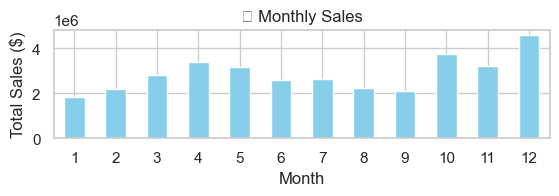

In [38]:
# 📅 نمودار فروش ماهانه
plt.subplot(3, 1, 1)
sales_by_month.plot(kind='bar', color='skyblue')
plt.title('📅 Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Macbook Pro Laptop'),
  Text(1, 0, 'iPhone'),
  Text(2, 0, 'ThinkPad Laptop'),
  Text(3, 0, 'Google Phone'),
  Text(4, 0, '27in 4K Gaming Monitor'),
  Text(5, 0, '34in Ultrawide Monitor'),
  Text(6, 0, 'Apple Airpods Headphones'),
  Text(7, 0, 'Flatscreen TV'),
  Text(8, 0, 'Bose SoundSport Headphones'),
  Text(9, 0, '27in FHD Monitor')])

c:\Users\homayoun\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  func(*args, **kwargs)
c:\Users\homayoun\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


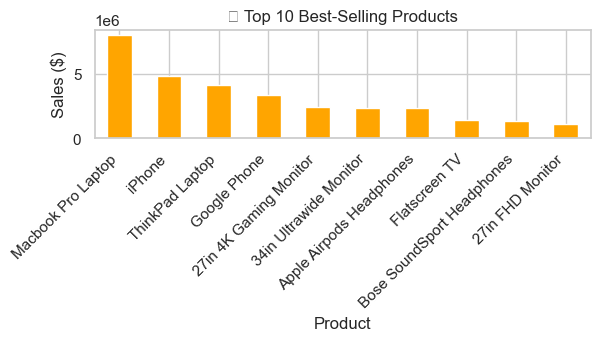

In [37]:
# 🏆 پرفروش‌ترین محصولات
plt.subplot(3, 1, 2)
best_selling_products.head(10).plot(kind='bar', color='orange')
plt.title('🏆 Top 10 Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45, ha='right')


C:\Users\homayoun\AppData\Local\Temp\ipykernel_4768\781422491.py:8: UserWarning: Glyph 127750 (\N{CITYSCAPE AT DUSK}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\homayoun\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127750 (\N{CITYSCAPE AT DUSK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


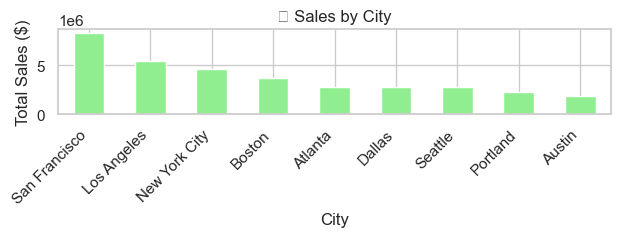

In [36]:
# 🌆 فروش بر اساس شهر
plt.subplot(3, 1, 3)
sales_by_city.plot(kind='bar', color='lightgreen')
plt.title('🌆 Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [35]:

# ✅ چاپ نتایج عددی در کنسول
print("\n------ Summary ------")
print("Total Sales by Month:\n", sales_by_month)
print("\nTop 10 Products:\n", best_selling_products.head(10))
print("\nSales by City:\n", sales_by_city)


------ Summary ------
Total Sales by Month:
 Month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: Sales, dtype: float64

Top 10 Products:
 Product
Macbook Pro Laptop            8032500.00
iPhone                        4792900.00
ThinkPad Laptop               4127958.72
Google Phone                  3317400.00
27in 4K Gaming Monitor        2433147.61
34in Ultrawide Monitor        2352898.08
Apple Airpods Headphones      2345550.00
Flatscreen TV                 1443900.00
Bose SoundSport Headphones    1342865.70
27in FHD Monitor              1131074.59
Name: Sales, dtype: float64

Sales by City:
 City
San Francisco    8254743.55
Los Angeles      5448304.28
New York City    4661867.14
Boston           3658627.65
Atlanta          2794199.07
Dallas           2765373.96
Seattle          2745046.02
Portland         2319331.94
Austi